In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('clean_movies_w_imdb_rating.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'clean_movies_w_imdb_rating.csv'

In [174]:
df.columns

Index(['Unnamed: 0', 'id', 'title', 'release_date', 'vote_average', 'overview',
       'poster_path', 'original_language', 'genre_names', 'popularity',
       'vote_count', 'backdrop_path', 'original_title', 'adult', 'video',
       'production_companies', 'production_countries', 'runtime',
       'spoken_languages', 'budget', 'revenue', 'status', 'tagline', 'imdb_id',
       'cast', 'crew', 'combined_text', 'imdb_rating', 'imdb_votes'],
      dtype='object')

In [175]:
df['first_production_company'] = df['production_companies'].str.split(',').str[0]

company_mean_rating = df.groupby('first_production_company')['imdb_rating'].mean()
df['company_rating'] = df['first_production_company'].map(company_mean_rating)

df['cast'] = df['cast'].str.split(',').str[0]
actor_mean_rating = df.groupby('cast')['imdb_rating'].mean()

df['actor_encoded'] = df['cast'].map(actor_mean_rating)
director_mean_rating = df.groupby('crew')['imdb_rating'].mean()
df['director_rating'] = df['crew'].map(director_mean_rating)
df

,Unnamed: 0,id,title,release_date,vote_average,overview,poster_path,original_language,genre_names,popularity,...,imdb_id,cast,crew,combined_text,imdb_rating,imdb_votes,first_production_company,company_rating,actor_encoded,director_rating
0,0,278,The Shawshank Redemption,1994-09-23,8.700,Imprisoned in the 1940s for the double murder ...,https://image.tmdb.org/t/p/w500/9cqNxx0GxF0bfl...,en,"Drama, Crime",157.766,...,tt0111161,Tim Robbins,Frank Darabont,The Shawshank Redemption Imprisoned in the 194...,9.3,2972099.0,Castle Rock Entertainment,6.764706,7.283333,7.975000
1,1,238,The Godfather,1972-03-14,8.689,"Spanning the years 1945 to 1955, a chronicle o...",https://image.tmdb.org/t/p/w500/3bhkrj58Vtu7en...,en,"Drama, Crime",190.434,...,tt0068646,Marlon Brando,Francis Ford Coppola,"The Godfather Spanning the years 1945 to 1955,...",9.2,2073116.0,Paramount Pictures,6.702703,7.180000,7.160000
2,2,240,The Godfather Part II,1974-12-20,8.600,In the continuing saga of the Corleone crime f...,https://image.tmdb.org/t/p/w500/hek3koDUyRQk7F...,en,"Drama, Crime",96.518,...,tt0071562,Al Pacino,Francis Ford Coppola,The Godfather Part II In the continuing saga o...,9.0,1399410.0,Paramount Pictures,6.702703,7.330435,7.160000
3,3,424,Schindler's List,1993-12-15,8.567,The true story of how businessman Oskar Schind...,https://image.tmdb.org/t/p/w500/sF1U4EUQS8YHUY...,en,"Drama, History, War",68.609,...,tt0108052,Liam Neeson,Steven Spielberg,Schindler's List The true story of how busines...,9.0,1490120.0,Amblin Entertainment,6.782759,6.562500,7.443333
4,4,389,12 Angry Men,1957-04-10,8.500,The defense and the prosecution have rested an...,https://image.tmdb.org/t/p/w500/ow3wq89wM8qd5X...,en,Drama,48.220,...,tt0050083,Martin Balsam,Sidney Lumet,12 Angry Men The defense and the prosecution h...,9.0,896910.0,United Artists,7.187273,8.250000,7.760000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9720,9762,248705,The Visitors: Bastille Day,2016-03-23,4.108,"Stuck in the corridors of time, Godefroy de Mo...",https://image.tmdb.org/t/p/w500/z2AV9HgEjTPwY2...,fr,"Comedy, Fantasy",10.088,...,tt2441982,Jean Reno,Jean-Marie PoirÃ©,The Visitors: Bastille Day Stuck in the corrid...,4.6,4904.0,Gaumont,6.709756,6.544444,6.266667
9721,9775,419507,Escape From Reuma Park,2016-12-15,4.000,"Old and forgotten, comedian Aldo is brought by...",https://image.tmdb.org/t/p/w500/gS6lW5OVa29noa...,it,Comedy,4.609,...,tt6281538,Aldo Baglio,Giacomo Poretti,"Escape From Reuma Park Old and forgotten, come...",NaN,NaN,Medusa Film,6.259091,6.466667,NaN
9722,9779,510452,All Inclusive,2019-02-13,3.937,A man goes on an all-inclusive vacation to the...,https://image.tmdb.org/t/p/w500/tFvwfaHpm8AJ9o...,fr,Comedy,4.938,...,tt8129966,Franck Dubosc,Fabien Onteniente,All Inclusive A man goes on an all-inclusive v...,NaN,NaN,Warner Bros. Entertainment France,NaN,4.850000,4.633333
9723,9781,238930,Brain Drain,2013-11-21,3.889,"Five deadbeat, sex-crazed friends forge their ...",https://image.tmdb.org/t/p/w500/kfZXag3DkaHfak...,it,Comedy,6.428,...,tt3040510,Paolo Ruffini,Paolo Ruffini,"Brain Drain Five deadbeat, sex-crazed friends ...",NaN,NaN,Medusa Film,6.259091,NaN,NaN


In [176]:
df = df.dropna()
df = df.reset_index(drop=True)


In [177]:
df = df[df['budget'] != 0]
df = df[df['revenue'] != 0]

df1 = df[['popularity', 'budget', 'revenue', 'runtime', 'genre_names', 'imdb_rating', 'company_rating', 'director_rating', 'actor_encoded']]

df_genres = df1['genre_names'].str.split(', ', expand=True)

df_dummies = pd.get_dummies(df_genres.stack(), prefix='genre').groupby(level=0).sum()

df1 = pd.concat([df1, df_dummies], axis=1)

df1 = df1.drop(columns=['genre_names'])

df1

,popularity,budget,revenue,runtime,imdb_rating,company_rating,director_rating,actor_encoded,genre_Action,genre_Adventure,...,genre_History,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science Fiction,genre_TV Movie,genre_Thriller,genre_War,genre_Western
0,157.766,25000000,28341469,142,9.3,6.764706,7.975000,7.283333,0,0,...,0,0,0,0,0,0,0,0,0,0
1,190.434,6000000,245066411,175,9.2,6.702703,7.160000,7.180000,0,0,...,0,0,0,0,0,0,0,0,0,0
2,96.518,13000000,102600000,202,9.0,6.702703,7.160000,7.330435,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68.609,22000000,321365567,195,9.0,6.782759,7.443333,6.562500,0,0,...,1,0,0,0,0,0,0,0,1,0
4,48.220,397751,4360000,97,9.0,7.187273,7.760000,8.250000,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7474,11.284,20000000,2128186,85,4.4,4.400000,4.400000,4.950000,1,0,...,0,0,0,0,0,0,0,1,0,0
7475,34.466,72000000,46495349,112,5.1,5.100000,6.550000,6.500000,0,1,...,0,0,0,0,0,0,0,0,0,0
7480,29.912,27000000,85600000,89,3.6,5.597872,6.035294,5.200000,1,0,...,0,0,0,0,0,0,0,0,0,0
7487,27.808,27000000,17854472,103,4.7,5.850000,5.433333,6.440000,0,1,...,0,0,0,0,0,0,0,0,0,1


In [178]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

X = df1.drop(columns=['imdb_rating'])  
y = df1['imdb_rating']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#1. LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Linear Regression - MAE: {mae_lr}, R²: {r2_lr}')

#2. RandomForest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest - MAE: {mae_rf}, R²: {r2_rf}')

#3. Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f'Gradient Boosting - MAE: {mae_gb}, R²: {r2_gb}')



Linear Regression - MAE: 0.35467005473605673, R²: 0.788465898807611
Random Forest - MAE: 0.331286270691334, R²: 0.8069717890054822
Gradient Boosting - MAE: 0.33513356010386947, R²: 0.8132838665512994


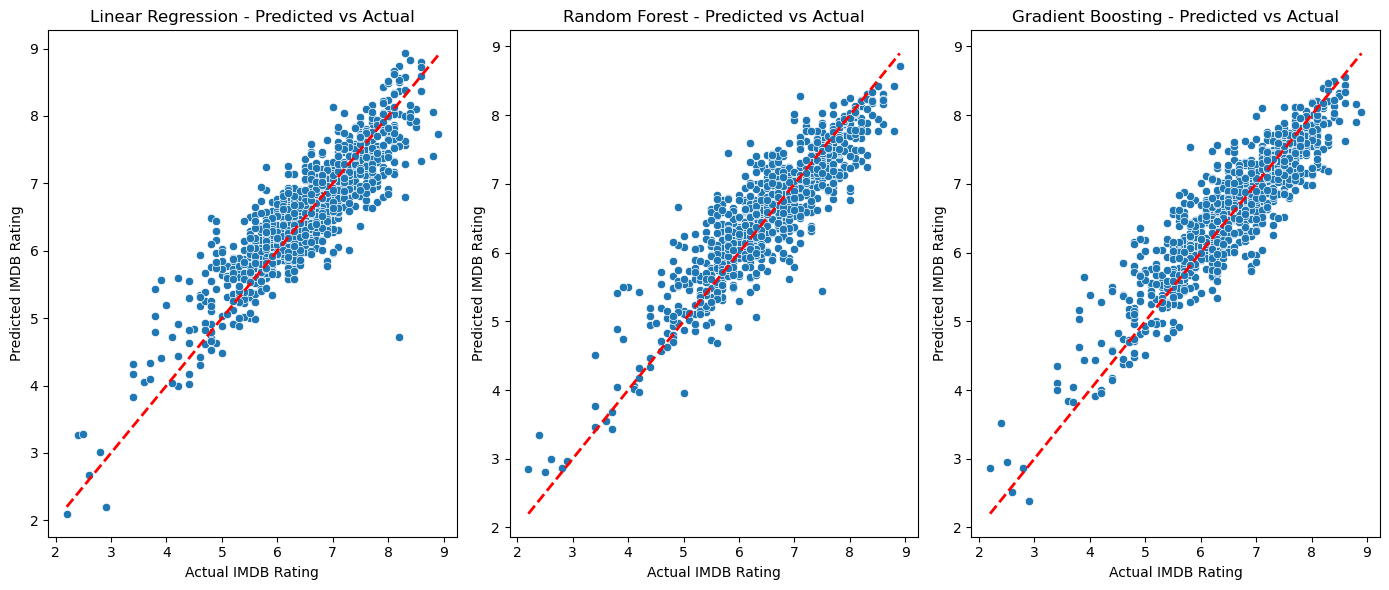

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)

y_actual = y_test

plt.figure(figsize=(14, 6))

#1. Linear Regression
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_actual, y=y_pred_lr)
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], 'r--', lw=2)
plt.title('Linear Regression - Predicted vs Actual')
plt.xlabel('Actual IMDB Rating')
plt.ylabel('Predicted IMDB Rating')

#2. Random Forest
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_actual, y=y_pred_rf)
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], 'r--', lw=2)
plt.title('Random Forest - Predicted vs Actual')
plt.xlabel('Actual IMDB Rating')
plt.ylabel('Predicted IMDB Rating')

#3. Gradient Boosting
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_actual, y=y_pred_gb)
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], 'r--', lw=2)
plt.title('Gradient Boosting - Predicted vs Actual')
plt.xlabel('Actual IMDB Rating')
plt.ylabel('Predicted IMDB Rating')

plt.tight_layout()
plt.show()
